In [1]:
import sys
! "{sys.executable}" -m pip install plotly


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Shantanoo Aher\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [3]:
import h5py
import numpy as np
import plotly.graph_objects as go

In [4]:
file_dir=r"C:\Users\Shantanoo Aher\OneDrive\Documents\3RIMG_02JUL2025_0345_L2B_HEM_V01R00.h5"

In [33]:
with h5py.File(file_dir, 'r') as f:
    geo_x = f['GeoX'][:]
    geo_y = f['GeoY'][:]
    hem = f['HEM'][0]

In [34]:
lon_grid, lat_grid = np.meshgrid(geo_x, geo_y)

hem_clipped = np.clip(hem, 0, 200)


In [35]:
step = 10
lon_ds = lon_grid[::step, ::step]
lat_ds = lat_grid[::step, ::step]
hem_ds = hem_clipped[::step, ::step]

In [48]:
fig = go.Figure(data=[go.Surface(
    z=hem_ds,
    x=lon_ds,
    y=lat_ds,
    colorscale='YlGnBu',
    colorbar=dict(title="HEM Intensity (mm/hr)")
)])

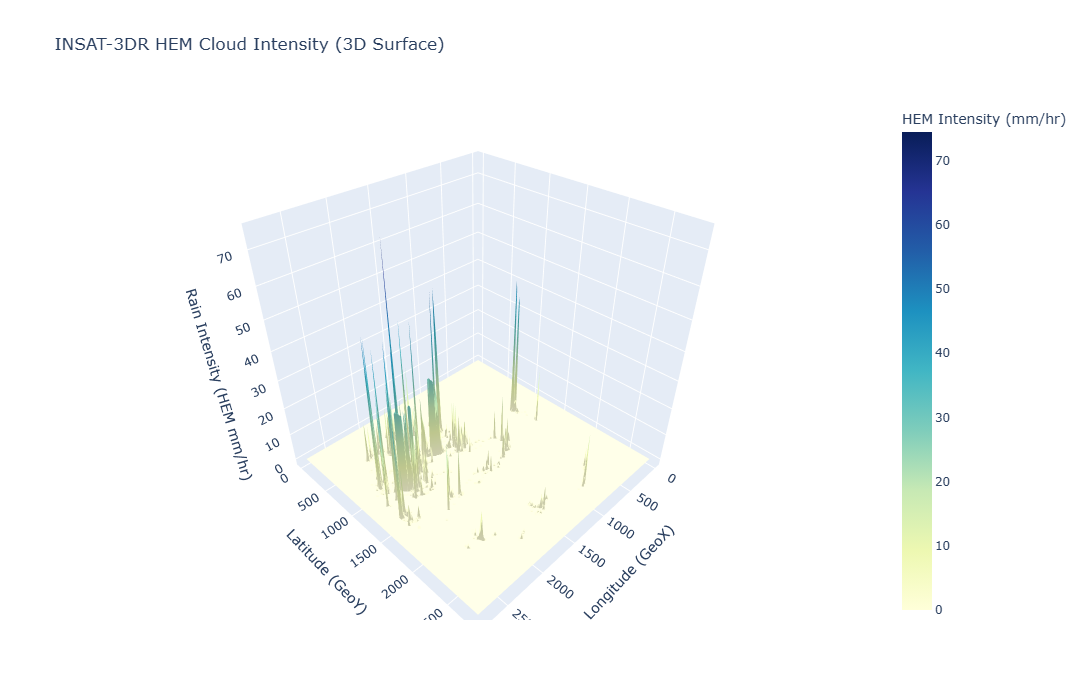

In [49]:
fig.update_layout(
    title="INSAT-3DR HEM Cloud Intensity (3D Surface)",
    scene=dict(
        xaxis_title="Longitude (GeoX)",
        yaxis_title="Latitude (GeoY)",
        zaxis_title="Rain Intensity (HEM mm/hr)"
    ),
    height=700
)

fig.show()